<font size="5" face="serif">I use the <span style="color:blue">Keras</span> package to fetch the mnist dataset, but you can also get it from a variety of sources.</font>

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
(Train_Imgs, Train_Labels), (Test_Imgs, Test_Labels) = mnist.load_data()
Train_Imgs=Train_Imgs/255
Test_Imgs=Test_Imgs/255

The train data set contains 60000 images with the size of 28 * 28.
The test data set contains 10000 images with the size of 28 * 28.
Here are some sample data point:



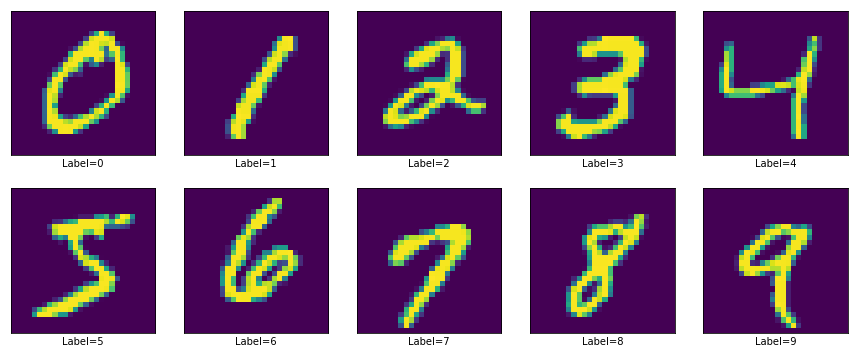

In [2]:
print("The train data set contains {} images with the size of {} * {}.".format(*Train_Imgs.shape))
print("The test data set contains {} images with the size of {} * {}.".format(*Test_Imgs.shape))
print("Here are some sample data point:\n")
f, axes = plt.subplots(2, 5, figsize=(15, 6))
Sample_Indexes=[np.where(Train_Labels==i)[0][0] for i in range(10)]
for i in range(2):
    for j in range(5):
        axes[i,j].imshow(Train_Imgs[Sample_Indexes[i*5+j]])
        axes[i,j].grid(False)
        axes[i,j].set(xlabel="Label={}".format(i*5+j))
        axes[i,j].set_yticklabels([])
        axes[i,j].set_xticklabels([])
        axes[i,j].tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, left=False)

In [3]:
Train_Imgs=Train_Imgs.reshape(-1,28*28)
Test_Imgs=Test_Imgs.reshape(-1,28*28)



In [4]:
import tensorflow as tf;
model=tf.keras.models.Sequential([tf.keras.layers.Dense(10,input_shape=(784,), activation="softmax")]);
model.compile(optimizer='Adam',
loss="categorical_crossentropy",
metrics=['accuracy']);

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
model.fit(x=Train_Imgs,y=tf.keras.utils.to_categorical(Train_Labels),epochs=5);

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4651 - acc: 0.8773
Epoch 2/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3031 - acc: 0.9144
Epoch 3/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2828 - acc: 0.9215
Epoch 4/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2722 - acc: 0.9240
Epoch 5/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2664 - acc: 0.9255


In [6]:
pred=model.predict_classes(Test_Imgs)

In [7]:
from sklearn.metrics import confusion_matrix as CM
cm_log=CM(y_true=pred,y_pred=Test_Labels)
cm_log=cm_log/cm_log.sum(axis=1)[:,None]


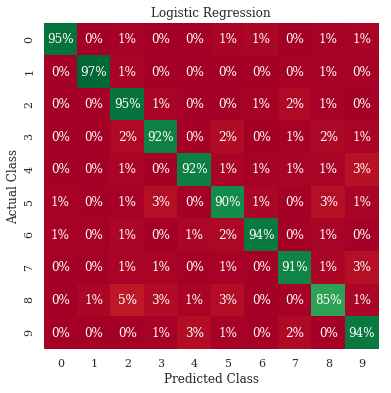

In [8]:
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
sns.set(font="serif",font_scale=1)
f, ax = plt.subplots(1,1, figsize=(6, 6))
sns.heatmap(cm_log,cmap="RdYlGn",annot=True,fmt='.0%',cbar=False,ax=ax);
ax.set_xlabel('Predicted Class');
ax.set_ylabel('Actual Class');
ax.set_title('Logistic Regression');